# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [137]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [138]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [139]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [140]:
#function
print df_raw.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE is scored from 200-800 and GPAs are from 0.0-4.0, so the GRE ought to have a larger standard deviation.

#### Question 4. Drop data points with missing data


In [143]:
df = df_raw
df = df.dropna(axis=0, how='any')

df.describe()


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I know GRE[187] is a NaN value, can check directly that that's no longer the case. I can check that the row counts successfully decreased. I can cycle through each column and check there are no NaN values.

#### Question 6. Create box plots for GRE and GPA

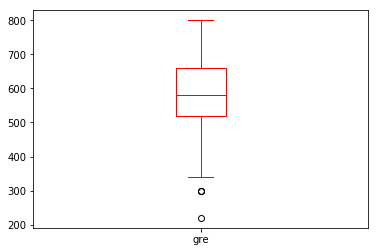

In [144]:
#boxplot 1
a1 = df['gre'].plot(kind='box', color='red')


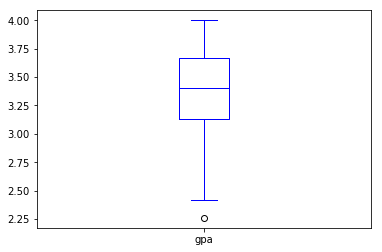

In [145]:
#boxplot 2 
a2 = df.gpa.plot(kind='box',color='blue')

#### Question 7. What do this plots show?

Answer: The data is fairly normally distributed with a few outliers skewing both sets to the left.

#### Question 8. Describe each distribution 

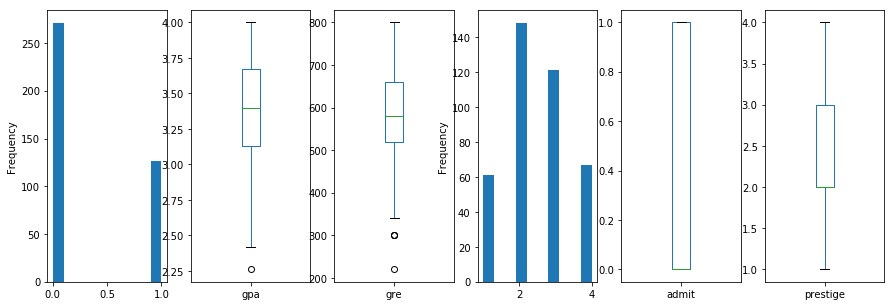

In [146]:
# plot the distribution of each variable 
# rubric says boxplots, so plotting 6 graphs
fig, axs = plt.subplots(1,6, figsize=(15,5))

df['admit'].plot(kind='hist', ax=axs[0], x='admit')
df['gpa'].plot(kind='box', ax=axs[1], x='gpa')
df['gre'].plot(kind='box', ax=axs[2], x='gre')
df['prestige'].plot(kind='hist', ax=axs[3], x='prestige')
df['admit'].plot(kind='box', ax=axs[4])
df['prestige'].plot(kind='box', ax=axs[5])

plt.show()

#print ('kurtosis', df.kurtosis())
#print ('skew', df.skew())

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 
No, admit is not normally distributed, with twice as many denies as admits. GPA and to a lesser extent GRE are skewed to the left (median > mean, long left tail). Prestige is close to normal.

This can also be seen from none of the variables having skew close to 0.


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The skew is fairly low and the data isn't far off normal. There are some outliers which could be scraped.

#### Question 11. Which of our variables are potentially colinear? 

In [96]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: None of the variables have high colinearity. GPA and GRE are the closest to colinear at .38, which is not great.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First explore the individual data sets, dealing with missing values, outliers, and skew. Next try xplore different models to see if they can accurately prescribe a relationship. Start with linear regression modeling, looking at the r^2 values to test correlation. 

#### Question 14. What is your hypothesis? 

Answer: Hypothesis: The prestige of a student's undergraduate alma materis directly correlated with getting admitted on a graduate school application.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data